In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
transaction_df = pd.read_excel('/content/drive/MyDrive/DA - Internship/KPMG.xlsx', sheet_name = 'Transactions')
transaction_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,product_first_sold_date,standard_cost
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,2012-12-02,53.62
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,2014-03-03,388.92
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,1999-07-20,248.82
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,1998-12-16,381.10
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,2015-08-10,709.48


In [ ]:
transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  product_first_sold_date  19803 non-null  datetime64[ns]
 12  standard_cost            19803 n

In [ ]:
print(transaction_df.isnull().sum()/len(transaction_df))

transaction_id             0.00000
product_id                 0.00000
customer_id                0.00000
transaction_date           0.00000
online_order               0.01800
order_status               0.00000
brand                      0.00985
product_line               0.00985
product_class              0.00985
product_size               0.00985
list_price                 0.00000
product_first_sold_date    0.00985
standard_cost              0.00985
dtype: float64


In [ ]:
transaction_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000


From the above tables we can clearly see a few anaomalies and add-ons required for the transactions dataframe:
1. We can see that majorly orders were placed online.
2. We can add a feature for profits for products based on their list price and cost price.

In [ ]:
transaction_df.list_price[0]

71.49

In [ ]:
transaction_df['profit'] = transaction_df['list_price'] - transaction_df['standard_cost']

In [ ]:
transaction_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,profit
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,551.950915
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,493.412849
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,4.800000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,133.780000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,445.210000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,830.240000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,1702.550000


In [ ]:
transaction_df['profit'].head()

0      17.87
1    1702.55
2    1544.61
3     817.36
4    1055.82
Name: profit, dtype: float64

Now let's check if there are null values within the data.

In [ ]:
transaction_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
product_first_sold_date    197
standard_cost              197
profit                     197
dtype: int64

In [ ]:
transaction_df = transaction_df.dropna()

In [ ]:
transaction_df.isnull().sum()

As we can see the null values are 0.5 percept of the total number of values, hence, we can drop there null values.

In [ ]:
transaction_df.dropna(inplace = True)

In [ ]:
transaction_df.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
profit                     0
dtype: int64

Now, we'll be pre-processing customer demographic data.

In [ ]:
custdemog_df = pd.read_excel('/content/drive/MyDrive/DA - Internship/KPMG.xlsx', sheet_name = 'CustomerDemographic')
custdemog_df.head()

<ipython-input-16-db080e91f738>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  custdemog_df = pd.read_excel('/content/drive/MyDrive/DA - Internship/KPMG.xlsx', sheet_name = 'CustomerDemographic')


,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [ ]:
custdemog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  default     

In [ ]:
custdemog_df.drop(['default'], axis = 1)

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,Yes,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,3996,Rosalia,Halgarth,Female,8,1975-08-09,VP Product Management,Health,Mass Customer,N,No,19.0
3996,3997,Blanch,Nisuis,Female,87,2001-07-13,Statistician II,Manufacturing,High Net Worth,N,Yes,1.0
3997,3998,Sarene,Woolley,U,60,NaT,Assistant Manager,IT,High Net Worth,N,No,NaN
3998,3999,Patrizius,NaN,Male,11,1973-10-24,NaN,Manufacturing,Affluent Customer,N,Yes,10.0


In [ ]:
from datetime import datetime, date

In [ ]:
today = pd.to_datetime(date.today())
print(today.year - custdemog_df.DOB[0].year)

70


In [ ]:
now = pd.to_datetime('now', utc= True)
custdemog_df['age'] = (now.year - custdemog_df['DOB'].dt.year) - ((now.month - custdemog_df['DOB'].dt.month) < 0)

In [ ]:
custdemog_df['age']

0       69.0
1       42.0
2       69.0
3       61.0
4       46.0
        ... 
3995    48.0
3996    22.0
3997     NaN
3998    49.0
3999    31.0
Name: age, Length: 4000, dtype: float64

In [ ]:
custdemog_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                              506
job_industry_category                  656
wealth_segment                           0
deceased_indicator                       0
default                                302
owns_car                                 0
tenure                                  87
age                                     87
dtype: int64

In [ ]:
custdemog_df = custdemog_df.drop('default', axis = 'columns')
custdemog_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            3875 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            3494 non-null   object        
 7   job_industry_category                3344 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [ ]:
custdemog_df = custdemog_df.dropna()

In [ ]:
custdemog_df = custdemog_df.drop('DOB', axis = 'columns')

In [ ]:
custdemog_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2780 entries, 0 to 3996
Data columns (total 12 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2780 non-null   int64  
 1   first_name                           2780 non-null   object 
 2   last_name                            2780 non-null   object 
 3   gender                               2780 non-null   object 
 4   past_3_years_bike_related_purchases  2780 non-null   int64  
 5   job_title                            2780 non-null   object 
 6   job_industry_category                2780 non-null   object 
 7   wealth_segment                       2780 non-null   object 
 8   deceased_indicator                   2780 non-null   object 
 9   owns_car                             2780 non-null   object 
 10  tenure                               2780 non-null   float64
 11  age                           

In [ ]:
custdemog_df.isnull().sum()

customer_id                            0
first_name                             0
last_name                              0
gender                                 0
past_3_years_bike_related_purchases    0
job_title                              0
job_industry_category                  0
wealth_segment                         0
deceased_indicator                     0
owns_car                               0
tenure                                 0
age                                    0
dtype: int64

Now, we'll be analyzing customer address dataset.

In [ ]:
custadd_df = pd.read_excel('/content/drive/MyDrive/DA - Internship/KPMG.xlsx', sheet_name = 'CustomerAddress')
custadd_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [ ]:
custadd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [ ]:
custadd_df.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

Merging all the datasets together, for analyzing data further

In [ ]:
merge_cust_data_df = pd.merge(custdemog_df, custadd_df, left_on = 'customer_id', right_on = 'customer_id', how = 'left')

In [ ]:
merge_cust_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2780 entries, 0 to 2779
Data columns (total 17 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          2780 non-null   int64  
 1   first_name                           2780 non-null   object 
 2   last_name                            2780 non-null   object 
 3   gender                               2780 non-null   object 
 4   past_3_years_bike_related_purchases  2780 non-null   int64  
 5   job_title                            2780 non-null   object 
 6   job_industry_category                2780 non-null   object 
 7   wealth_segment                       2780 non-null   object 
 8   deceased_indicator                   2780 non-null   object 
 9   owns_car                             2780 non-null   object 
 10  tenure                               2780 non-null   float64
 11  age                           

In [ ]:
merge_cust_data_df['customer_id'].tail()

2775    3993
2776    3994
2777    3995
2778    3996
2779    3997
Name: customer_id, dtype: int64

In [ ]:
final_df = pd.merge(merge_cust_data_df, transaction_df, left_on = 'customer_id', right_on = 'customer_id', how = 'right')

In [ ]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19445 entries, 0 to 19444
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          19445 non-null  int64         
 1   first_name                           13648 non-null  object        
 2   last_name                            13648 non-null  object        
 3   gender                               13648 non-null  object        
 4   past_3_years_bike_related_purchases  13648 non-null  float64       
 5   job_title                            13648 non-null  object        
 6   job_industry_category                13648 non-null  object        
 7   wealth_segment                       13648 non-null  object        
 8   deceased_indicator                   13648 non-null  object        
 9   owns_car                             13648 non-null  object        
 10  tenure    

In [ ]:
final_df = final_df.dropna()
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13636 entries, 0 to 19444
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          13636 non-null  int64         
 1   first_name                           13636 non-null  object        
 2   last_name                            13636 non-null  object        
 3   gender                               13636 non-null  object        
 4   past_3_years_bike_related_purchases  13636 non-null  float64       
 5   job_title                            13636 non-null  object        
 6   job_industry_category                13636 non-null  object        
 7   wealth_segment                       13636 non-null  object        
 8   deceased_indicator                   13636 non-null  object        
 9   owns_car                             13636 non-null  object        
 10  tenure    

In [ ]:
final_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,2950,Kristos,Anthony,Male,19.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,...,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,3120,Lauree,O'Donnell,Female,89.0,Clinical Specialist,Health,Mass Customer,N,Yes,...,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,402,Berne,Donegan,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,N,No,...,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,3135,Titus,Worsall,Male,83.0,Staff Scientist,Financial Services,Mass Customer,N,No,...,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
5,2339,Damien,Haddeston,Male,3.0,Web Designer II,Property,Affluent Customer,N,Yes,...,1.0,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10,709.34


As we have got merged dataset, we'll detect outliers and remove those as well

<Axes: >

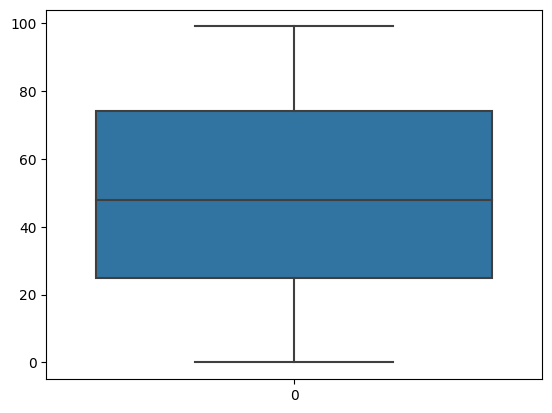

In [ ]:
sns.boxplot(final_df['past_3_years_bike_related_purchases'])

<Axes: >

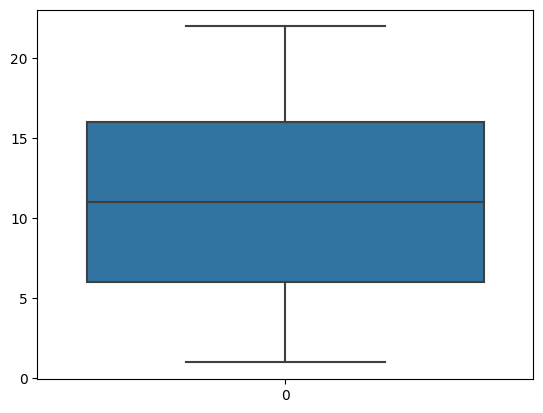

In [ ]:
sns.boxplot(final_df['tenure'])

<Axes: >

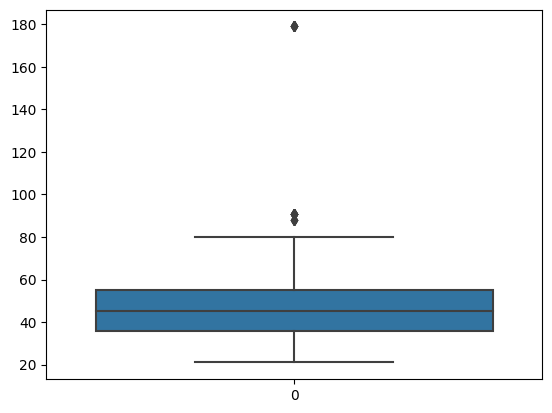

In [ ]:
sns.boxplot(final_df['age'])

In [ ]:
print(np.where(final_df['age']>80))

(array([  281,   708,   758,  1791,  2101,  2124,  2278,  3260,  3272,
        5174,  5212,  5925,  6179,  6686,  6785,  7047,  7313,  8236,
       10491, 12129, 12201, 13154, 13385]),)


In [ ]:
final_df[(final_df['age'] > 80)]

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
400,720,Darrel,Canet,Male,67.0,Recruiting Manager,Retail,Affluent Customer,N,No,...,0.0,Approved,Giant Bicycles,Standard,high,small,1977.36,1759.85,2014-07-28,217.51
1014,34,Jephthah,Bachmann,U,59.0,Legal Assistant,IT,Affluent Customer,N,No,...,1.0,Approved,Solex,Road,medium,small,1703.52,1516.13,2011-04-16,187.39
1080,34,Jephthah,Bachmann,U,59.0,Legal Assistant,IT,Affluent Customer,N,No,...,0.0,Approved,Norco Bicycles,Standard,low,medium,958.74,748.90,2005-12-07,209.84
2578,34,Jephthah,Bachmann,U,59.0,Legal Assistant,IT,Affluent Customer,N,No,...,0.0,Approved,Solex,Touring,medium,large,2083.94,675.03,2013-09-16,1408.91
3014,1092,Katlin,Creddon,Female,56.0,VP Quality Control,Retail,Mass Customer,N,No,...,1.0,Approved,Trek Bicycles,Standard,medium,medium,499.53,388.72,1999-06-23,110.81
3048,1092,Katlin,Creddon,Female,56.0,VP Quality Control,Retail,Mass Customer,N,No,...,0.0,Approved,Trek Bicycles,Standard,medium,small,1386.84,1234.29,2003-08-05,152.55
3274,1092,Katlin,Creddon,Female,56.0,VP Quality Control,Retail,Mass Customer,N,No,...,0.0,Approved,Norco Bicycles,Standard,medium,small,1216.14,1082.36,1991-08-05,133.78
4698,720,Darrel,Canet,Male,67.0,Recruiting Manager,Retail,Affluent Customer,N,No,...,0.0,Approved,Solex,Road,medium,large,1777.80,820.78,2012-05-18,957.02
4711,720,Darrel,Canet,Male,67.0,Recruiting Manager,Retail,Affluent Customer,N,No,...,1.0,Approved,Giant Bicycles,Standard,medium,small,1311.44,1167.18,1999-12-04,144.26
7401,720,Darrel,Canet,Male,67.0,Recruiting Manager,Retail,Affluent Customer,N,No,...,1.0,Approved,WeareA2B,Standard,medium,medium,1231.15,161.60,1993-07-20,1069.55


We can see a few distortion in the values of gender column.

In [ ]:
final_df['gender'].unique()

array(['Male', 'Female', 'U'], dtype=object)

In [ ]:
final_df.loc[final_df['gender'] == 'F', 'gender'] = 'Female'

In [ ]:
final_df.loc[final_df['gender'] == 'Femal', 'gender'] = 'Female'

In [ ]:
final_df['gender'].value_counts()

Female    6962
Male      6666
U            8
Name: gender, dtype: int64

In [ ]:
final_df = final_df.drop(final_df.loc[final_df['gender']=='U'].index)

In [ ]:
final_df['deceased_indicator'].unique()

array(['N'], dtype=object)

In [ ]:
final_df = final_df.drop(final_df.loc[final_df['deceased_indicator'] == 'Y'].index)

In [ ]:
final_df['online_order'] = final_df['online_order'].astype(int)

In [ ]:
final_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date,profit
0,2950,Kristos,Anthony,Male,19.0,Software Engineer I,Financial Services,Mass Customer,N,Yes,...,0,Approved,Solex,Standard,medium,medium,71.49,53.62,2012-12-02,17.87
1,3120,Lauree,O'Donnell,Female,89.0,Clinical Specialist,Health,Mass Customer,N,Yes,...,1,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,2014-03-03,1702.55
2,402,Berne,Donegan,Male,9.0,Desktop Support Technician,Retail,Affluent Customer,N,No,...,0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,1999-07-20,1544.61
3,3135,Titus,Worsall,Male,83.0,Staff Scientist,Financial Services,Mass Customer,N,No,...,0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,1998-12-16,817.36
5,2339,Damien,Haddeston,Male,3.0,Web Designer II,Property,Affluent Customer,N,Yes,...,1,Approved,Giant Bicycles,Road,medium,medium,1538.99,829.65,2006-11-10,709.34


With this, our data is clean and we are moving on to EDA. We'll be performing EDA on this data in data visualization tool, either tablue or powerBI. For this reason we'll be downloading the data into csv format.

In [ ]:
from google.colab import files
final_df.to_csv('/content/drive/MyDrive/DA - Internship/ready_data.csv')